# Plotting
Simple fast plots for the paper

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
RUN_ID = '45940W'

## Plot ETa

In [3]:
df = pd.read_pickle('data/predicted/eta_predicted.pickle')
df

,ETa,Source
Day,,
2018-01-01,6.250664,Predicted
2018-01-02,5.701330,Predicted
2018-01-03,6.270532,Predicted
2018-01-04,5.754692,Predicted
2018-01-05,6.002640,Predicted
...,...,...
2021-11-26,6.692578,Predicted
2021-11-27,5.993000,Predicted
2021-11-28,5.444306,Predicted


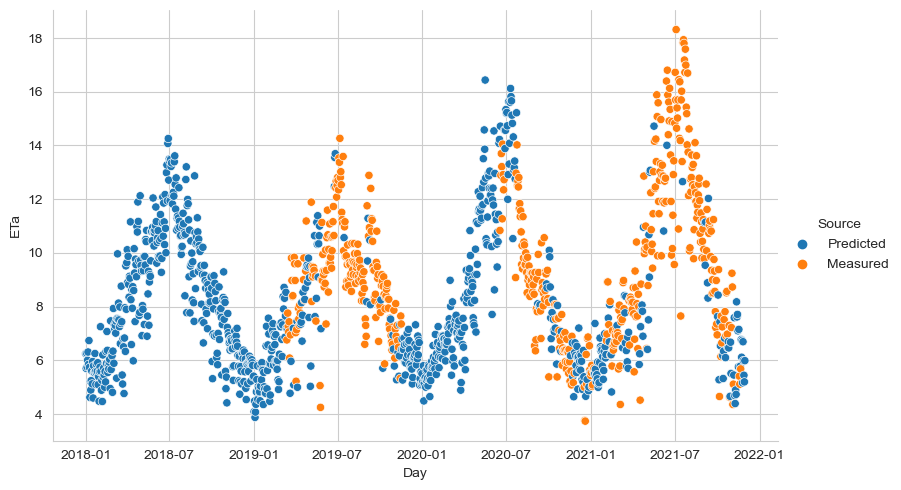

In [4]:
sns.relplot(df, x='Day', y='ETa', hue='Source', aspect=1.6)

## Scores

In [5]:
scores = pd.read_csv(f'logs/eta_scores_{RUN_ID}.csv',
                     sep=';',
                     index_col=[0, 1], header=[0, 1])
# Create an IndexSlice object
idx = pd.IndexSlice
scores_r2 = scores.loc[idx[:, 'r2'], :]

scores_r2 = scores_r2.mean().reset_index()
scores_r2.columns = ['Estimator', 'Model', 'R2']

In [6]:
s = scores.unstack().unstack(level=1).reset_index()
s.columns = ['Estimator', 'Model', 'Metric', 'Fold', 'Score']
s['Metric'] = [m.upper() for m in s['Metric']]
s['Estimator'] = [m.upper() for m in s['Estimator']]
s['Model'] = [x.split()[-1] for x in s['Model']]

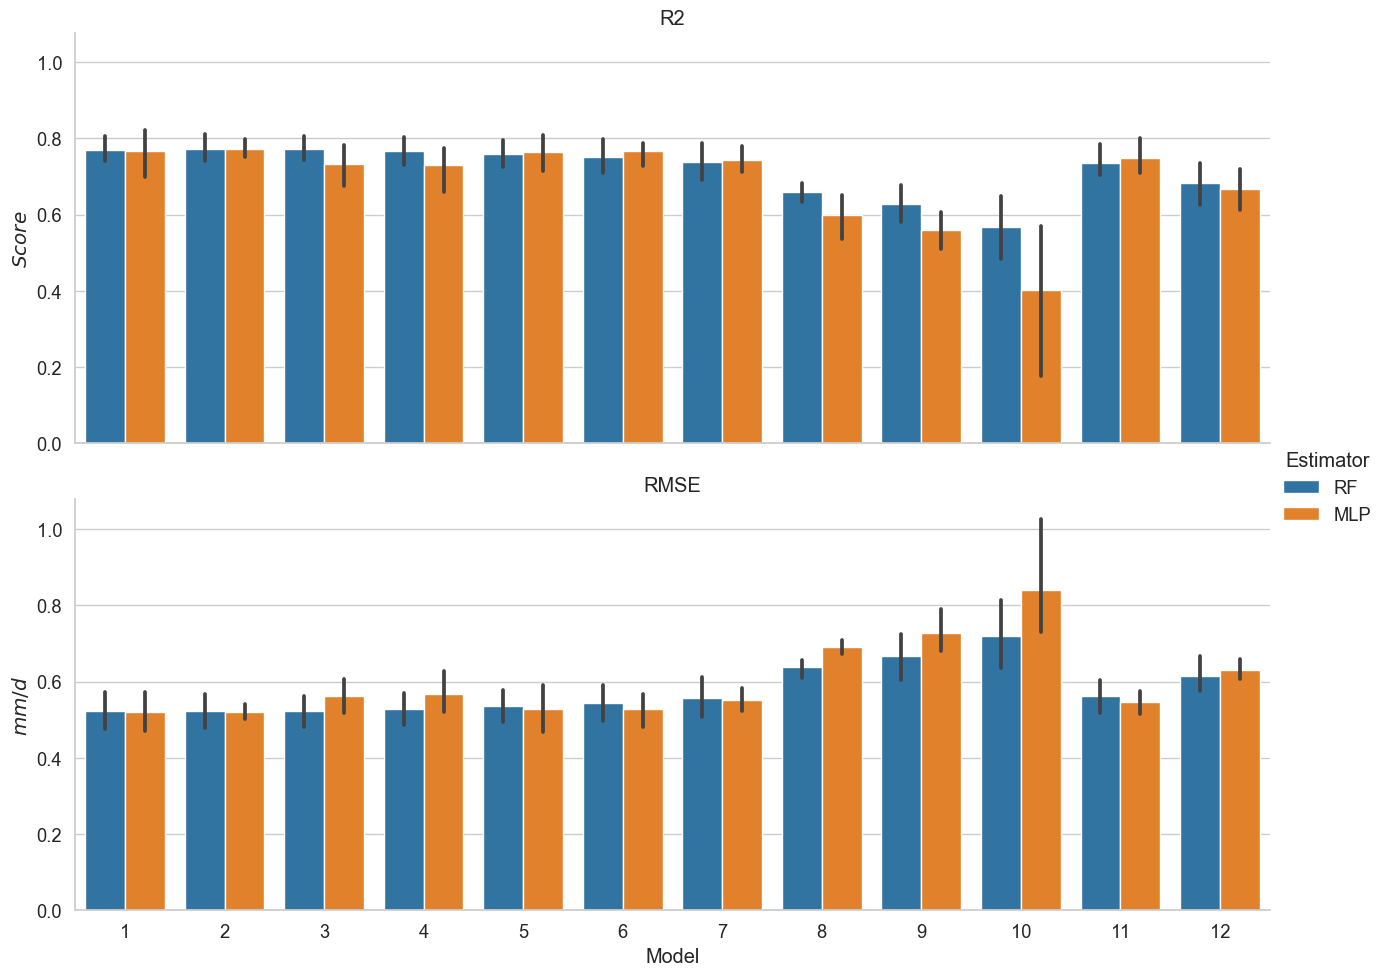

In [15]:
sns.set_context("notebook", font_scale=1.2)
# Create the bar plot
g = sns.catplot(data=s, x='Model', y='Score', row='Metric',
                hue='Estimator',
                margin_titles=False,
                kind='bar', aspect=2.6)
g.facet_axis(0, 0).set_ylabel('$Score$')
g.facet_axis(1, 0).set_ylabel('$mm/d$')
g.set_titles(row_template='{row_name}')

In [8]:
scores.index.names

FrozenList(['fold', 'metric'])

In [9]:
sns.load_dataset('penguins')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
